#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

Выборки неазвисимы. Представим, что данные в выборках - количество койко-дней в больнице до выздоровления. В этом случае нам необходимо выполнять односторонние тесты, так как интересует только один хвост плотности распределения значений со стороны уменьшения (слева).

Будем использовать нормальное распределение данных в выборках и критерий Стьюдента для независимых выборок.

In [1]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11)
A=scipy.stats.norm.rvs(scale=30,loc=11,size=100, random_state=777)
B=scipy.stats.norm.rvs(scale=54,loc=11,size=100, random_state=777)
alpha = 0.05

stat, p = scipy.stats.ttest_ind(A, B, equal_var=False)
if p/2 < alpha:
    print(f'Эффективность препаратов отличается на уровне значимости {alpha :.1%}')
else:
    print(f'Эффективность препаратов одинакова на уровне значимости {alpha :.1%}')

Эффективность препаратов одинакова на уровне значимости 5.0%


#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - Не принимающие препарат люди

B - Люди из группы А, которым дали препарат после проведения исследований без препарата

Выборка зависимая. Если наши данные имеют нормальное распределение и количественный тип, то можно использовать параметрический критерий Стьюдента для зависимых выборок. Также для зависимых выборок можно использовать непараметрический критерий Вилкоксона, для него распределение данных не имеет значения.

Представим, что данные в выборках - количество койко-дней в больнице до выздоровления. В этом случае нам необходимо выполнять односторонние тесты, так как интересует только один хвост плотности распределения значений со стороны уменьшения (слева).

H0 - Эффекта от препарата нет  
H1 - Эффект от препарата присутствует

In [3]:
np.random.seed(11)
A=scipy.stats.norm.rvs(scale=30,loc=11,size=100, random_state=777)
B=scipy.stats.norm.rvs(scale=54,loc=11,size=100, random_state=777)
alpha = 0.05

# Параметрический критерий Стьюдента для зависимыз выборок
stat, p = scipy.stats.ttest_rel(A, B)
if p/2 < alpha:
    print(f'Эффект от препарата присутствует на уровне значимости {alpha :.1%}')
else:
    print(f'Эффекта от препарата нет на уровне значимости {alpha :.1%}')

Эффекта от препарата нет на уровне значимости 5.0%


In [4]:
# Непараметрический критерий Вилкоксона для зависимыз выборок
stat, p = scipy.stats.wilcoxon(A, B, alternative='less')

if p < alpha:
    print(f'Эффект от препарата присутствует на уровне значимости {alpha :.1%}')
else:
    print(f'Эффекта от препарата нет на уровне значимости {alpha :.1%}')

Эффекта от препарата нет на уровне значимости 5.0%


#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


H0 - Эффекты от разного типа поливки не влияют на огурцы  
H1 - Эффекты от разного типа поливки оказывают сильное влияние на огурцы

Тест двусторонний, выборки независимые. Проверим гипотезы через дисперсионный анализ.

In [5]:
water = scipy.stats.norm.rvs(loc=50, scale=20, size=30)
nutri = scipy.stats.norm.rvs(loc=80, scale=20, size=30)
mineral = scipy.stats.norm.rvs(loc=55, scale=20, size=30)

alpha = 0.05

stats, p = scipy.stats.f_oneway(water, nutri, mineral)
if p < alpha:
    print(f'Эффекты от разного типа поливки оказывают сильное влияние на огурцы на уровне значимости {alpha :.1%}')   
else:
    print(f'Эффекты от разного типа поливки не влияют на огурцы на уровне значимости {alpha :.1%}')

Эффекты от разного типа поливки оказывают сильное влияние на огурцы на уровне значимости 5.0%


Как видим по дисперсионному анализу разные типы поливки огурцов действительно влияют на их параметры. Чтобы установить влияние эффекта от удобрения по сравнению с минералкой можно првоести непараметрический тест U-критерия Манна-Уитни.

У критерия есть следующие требования:
- в выборках должны быть все числа разные или число повторений должно быть невелико
- в каждой из выборок должно быть не менее 3 значений. Если в одной выборке 2 значения, то во второй должно быть не менее 5.

H0 - Разница между поливкой огурцов минералкой и удобрениями отсутствует  
H1 - Разница между поливкой огурцов минералкой и удобрениями присутствует

In [6]:
stats, p = scipy.stats.mannwhitneyu(nutri, mineral)
if p < alpha:
    print(f'Разница между поливкой огурцов минералкой и удобрениями присутствует на уровне значимости {alpha :.1%}')   
else:
    print(f'Разница между поливкой огурцов минералкой и удобрениями отсутствует на уровне значимости {alpha :.1%}')

Разница между поливкой огурцов минералкой и удобрениями присутствует на уровне значимости 5.0%


Наша статистика имеет нормальное распределение с количественными данными. Поэтому можем применить параметрический критерий Стьюдента для независимых выборок.

In [7]:
stats, p = scipy.stats.ttest_ind(nutri, mineral)
if p < alpha:
    print(f'Разница между поливкой огурцов минералкой и удобрениями присутствует на уровне значимости {alpha :.1%}')   
else:
    print(f'Разница между поливкой огурцов минералкой и удобрениями отсутствует на уровне значимости {alpha :.1%}')

Разница между поливкой огурцов минералкой и удобрениями присутствует на уровне значимости 5.0%


Чтобы понять какой вид поливки вносит более высокий вклад в размер огурцов, сравним средние значения

In [8]:
if nutri.mean() > mineral.mean():
    print(f'Поливка огурцов удобрениями оказывает более положительное влияние, чем поливка минералкой \
на уровне значимости {alpha :.1%}')
else:
    print(f'Поливка огурцов минералкой оказывает более положительное влияние, чем поливка удобрениями \
на уровне значимости {alpha :.1%}')

Поливка огурцов удобрениями оказывает более положительное влияние, чем поливка минералкой на уровне значимости 5.0%


### Cookie Cats

In [9]:
data = pd.read_csv('cookie_cats.csv')
data.retention_1 = data.retention_1.apply(lambda x: int(x))
data.retention_7 = data.retention_7.apply(lambda x: int(x))
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

Разделим наши датафреймы на 2 части:
- df_gate_30 -- датафрейм со статистикой ворот на 30 уровне
- df_gate_40 -- датафрейм со статистикой ворот на 40 уровне

In [10]:
df_gate_30 = data.loc[data.version == 'gate_30', ['userid', 'sum_gamerounds', 'retention_1', 'retention_7']]
df_gate_40 = data.loc[data.version == 'gate_40', ['userid', 'sum_gamerounds', 'retention_1', 'retention_7']]

Посмотрим на базовые статистические метрики.

In [11]:
df_gate_30.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.470000e+04,44700.000000,44700.000000,44700.000000
mean,4.987564e+06,52.456264,0.448188,0.190201
std,2.881026e+06,256.716423,0.497314,0.392464
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505469e+06,5.000000,0.000000,0.000000
50%,4.983631e+06,17.000000,0.000000,0.000000
75%,7.481497e+06,50.000000,1.000000,0.000000
max,9.999710e+06,49854.000000,1.000000,1.000000


In [12]:
df_gate_40.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.548900e+04,45489.000000,45489.000000,45489.000000
mean,5.009073e+06,51.298776,0.442283,0.182000
std,2.885496e+06,103.294416,0.496663,0.385849
min,3.770000e+02,0.000000,0.000000,0.000000
25%,2.517171e+06,5.000000,0.000000,0.000000
50%,5.007329e+06,16.000000,0.000000,0.000000
75%,7.510762e+06,52.000000,1.000000,0.000000
max,9.999861e+06,2640.000000,1.000000,1.000000


Выводы из анализа базовых статистических метрик:

- В обоих выборках значения квартилей практически одинаковы, можно предположить, что глобального влияние расположения ворот на 30 или 40 уровнях нет, можно говорить о небольшом влиянии факторов.
- 75% людей на первой неделе наигрывают не более 50-52 раундов.
- в обоих выборках только около 25% людей возвращаются в игру через день после установки, а через 7 дней еще меньше.
- по средним значениям retention_1 и retention_7 видно, что в случае ворот на 30 уровне люди возвращаются в игру через 1 и 7 дней немножко чаще. Выборсы в значениях отсутствуют, данные у нас порядковые с двумя состояниями, поэтому среднее в данных выборках корректна.
- значения медиан сильно расходятся со средними значениями, значит есть выбросы, которые сильно влияют на среднее. Поэтому критерии, основанные на анализе среднего будут не точно работать. Как вариант - разбивать выборку на диапазоны по количеству сыгранных раундов. Например от 0 до 100, от 100 до 1000, от 1000 до 3000.

Также наблюдается слишком большая разница между максимальными значениями sum_gamerounds аж более чем на 45 000. Есть предположение, что это выбросы. Проверим какое количество пользователей в выборке df_gate_30 наиграли более 2640 раундов за неделю.

In [13]:
df_gate_30[df_gate_30.sum_gamerounds > 2640]

,userid,sum_gamerounds,retention_1,retention_7
7912,871500,2961,1,1
57702,6390605,49854,0,1


Как видно такое аномальное количество уровней дал только один пользователь. Есть подозрение, что это не типичное поведение пользователя, вероятно в игру играл какой-то скрипт. Поэтому это значение можно удалить из выборки или заполнить средним значением.

In [14]:
df_gate_30.loc[df_gate_30.sum_gamerounds == 49854, 'sum_gamerounds'] = df_gate_30.sum_gamerounds.mean()
df_gate_30.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,4.470000e+04,44700.000000,44700.000000,44700.000000
mean,4.987564e+06,51.342135,0.448188,0.190201
std,2.881026e+06,102.056456,0.497314,0.392464
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.505469e+06,5.000000,0.000000,0.000000
50%,4.983631e+06,17.000000,0.000000,0.000000
75%,7.481497e+06,50.000000,1.000000,0.000000
max,9.999710e+06,2961.000000,1.000000,1.000000


Как видим у нас выровнялись значения дисперсии, теперь они практически равны, а ранее отличались более чем в 2 раза. При этом практически не имзенились другие основные метрики.

Проверим нет ли пропусков в наших данных.

In [15]:
df_gate_30.info()
df_gate_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44700 entries, 0 to 90186
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          44700 non-null  int64  
 1   sum_gamerounds  44700 non-null  float64
 2   retention_1     44700 non-null  int64  
 3   retention_7     44700 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45489 entries, 2 to 90188
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   userid          45489 non-null  int64
 1   sum_gamerounds  45489 non-null  int64
 2   retention_1     45489 non-null  int64
 3   retention_7     45489 non-null  int64
dtypes: int64(4)
memory usage: 1.7 MB


Как видим пропуски в наших данных отсутствуют, поэтому проблема с заполнением отсутствующих данных отсутствует.

Посмотрим на плотности распределения наших значений в выборках.

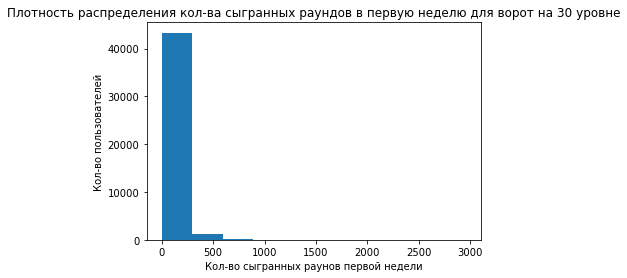

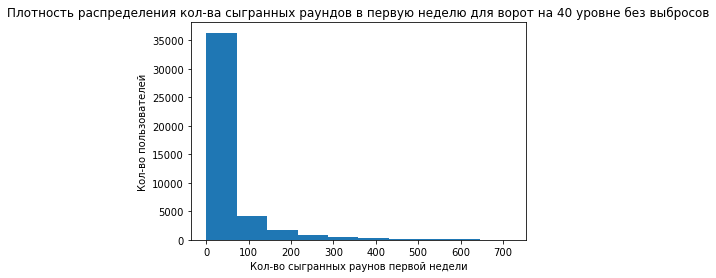

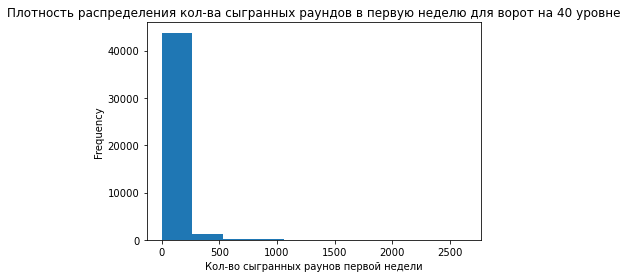

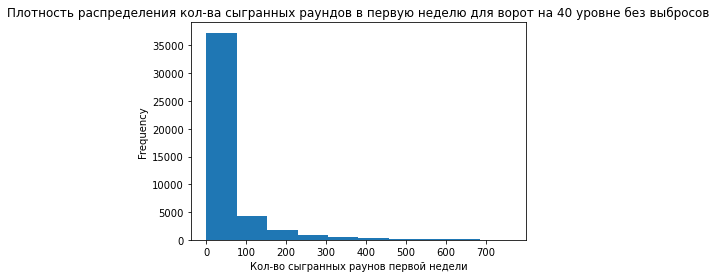

In [16]:
df_gate_30['sum_gamerounds'].plot(kind='hist')
plt.title("Плотность распределения кол-ва сыгранных раундов в первую неделю для ворот на 30 уровне")
plt.ylabel("Кол-во пользователей")
plt.xlabel("Кол-во сыгранных раунов первой недели")
plt.show()

df_gate_30.loc[df_gate_30.sum_gamerounds < df_gate_30.sum_gamerounds.quantile(0.997), 'sum_gamerounds'].plot(kind='hist')
plt.title("Плотность распределения кол-ва сыгранных раундов в первую неделю для ворот на 40 уровне без выбросов")
plt.ylabel("Кол-во пользователей")
plt.xlabel("Кол-во сыгранных раунов первой недели")
plt.show()

df_gate_40['sum_gamerounds'].plot(kind='hist')
plt.title("Плотность распределения кол-ва сыгранных раундов в первую неделю для ворот на 40 уровне")
plt.xlabel("Кол-во сыгранных раунов первой недели")
plt.show()

df_gate_40.loc[df_gate_40.sum_gamerounds < df_gate_40.sum_gamerounds.quantile(0.997), 'sum_gamerounds'].plot(kind='hist')
plt.title("Плотность распределения кол-ва сыгранных раундов в первую неделю для ворот на 40 уровне без выбросов")
plt.xlabel("Кол-во сыгранных раунов первой недели")
plt.show()

Как видно большая часть значений концентрируется на уровне от 0 до 100. Все остальные значения встречаются реже, как сказано было ранее, в боевой задаче имеет смысл значения больше 100 рассматривать отдельной группой.

Посмотрим на распределение количества игроков относительно количества сыгранных раундов.

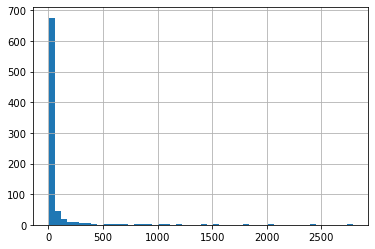

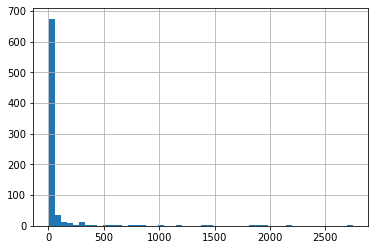

In [17]:
# Подсчет количества игроков для каждого количества раундов
df_plot_40 = df_gate_40.groupby('sum_gamerounds')['userid'].count()
df_plot_40.hist(bins=50)
plt.show()

df_plot_30 = df_gate_30.groupby('sum_gamerounds')['userid'].count()
df_plot_30.hist(bins=50)
plt.show()

Как видно по гистограмме большинство игроков играют не больше 50-70 раундов, это было понятно еще на этапе анализа квартилей, медиан и средних.

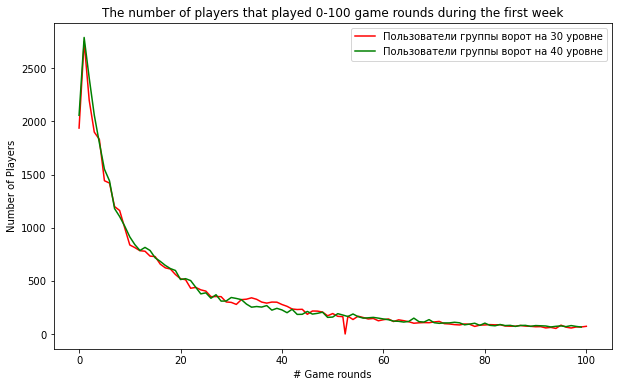

In [18]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

df_plot_30[:100].plot(figsize=(10,6), c='r')
plt.title("The number of players that played 0-100 game rounds during the first week")
plt.ylabel("Number of Players")
plt.xlabel('# Game rounds')

df_plot_40[:100].plot(figsize=(10,6), c='g')
plt.title("The number of players that played 0-100 game rounds during the first week")
plt.ylabel("Number of Players")
plt.xlabel('# Game rounds')
plt.legend(['Пользователи группы ворот на 30 уровне', 'Пользователи группы ворот на 40 уровне'])
plt.show()

Как видно по графику отличия незначительны, но тем не менее есть. Требуется выяснить являются ли эти отличия дейсвтительно статистически значимыми.

Ранее в анализе средних значений мы заметили, что пользователи из группы с воротами на 30 уровне возвращаются в игру через день и неделю немножко чаще, чем пользователи с воротами на 40 уровне.

Попробуем проверить эту гипотезу с помощью бутстрапа порядковых значений retention_1 и retention_7. С помощью бутстрапа получится воссоздать распределение значений на основе средних.

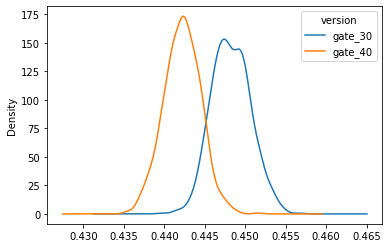

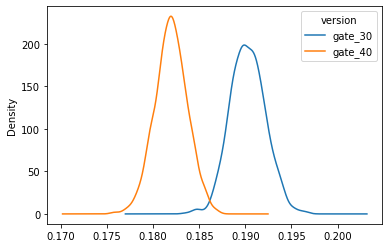

In [19]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Как видно по построенным графикам средние значения для пользователей с воротами на 30 уровне смещены в правую часть, а это означает, что именно эти пользователи возвращаются в игру немного чаще, чем пользователи с воротами на 40 уровне.

Теперь проверим гипотезы о влиянии ворот на разных уровнях на вовлеченность пользователей. Дисперсионный анализ мы не можем использовать, так как у нас даныне не имеют нормального распределения и даже не приближены к нему. Плюс 

H0 - Ворота на разных уровнях не влияют на количество пройденных уровней пользователями в первую неделю  
H1 - Ворота на разных уровнях оказывают значимое влияние на количество пройденных уровней пользователями в первую неделю

Так как у нас данные распределены не нормально и есть значительные выбросы, то для проверки этой гипотезы больше всего подходит U-критерий Манна-Уитни для независимых выборок. нас интересуют отклонения в обе стороны распределения, поэтому тест будет двусторонним.

In [20]:
stat, p = scipy.stats.mannwhitneyu(df_gate_30.sum_gamerounds, df_gate_40.sum_gamerounds)
alpha = 0.05

print('p-value:', round(p, 3))

if p < alpha:
    print(f'Ворота на разных уровнях оказывают значимое влияние на количество пройденных уровней пользователями \
в первую неделю на уровне значимости {alpha :.2%}')
    if df_gate_30.sum_gamerounds.mean() > df_gate_40.sum_gamerounds.mean():
        print(f'Ворота на уровне 30 больше затягивают пользователей в процесс игры')
    else:
        print(f'Ворота на уровне 40 больше затягивают пользователей в процесс игры')     
else:
    print(f'Ворота на разных уровнях не влияют на количество пройденных уровней пользователями в первую неделю \
на уровне значимости {alpha :.2%}')

p-value: 0.025
Ворота на разных уровнях оказывают значимое влияние на количество пройденных уровней пользователями в первую неделю на уровне значимости 5.00%
Ворота на уровне 30 больше затягивают пользователей в процесс игры


Так как в наших данных было много выбросов и абволютное большинство пользователей не наигрывают более 100 раундов в первую неделю, то во избежания ошибки в оценке наибольшего влияния сделаем пересчет.

In [21]:
if (df_gate_30[df_gate_30.sum_gamerounds < 100].sum_gamerounds.mean() > 
    df_gate_40[df_gate_40.sum_gamerounds < 100].sum_gamerounds.mean()):
    print(f'Ворота на уровне 30 больше затягивают пользователей в процесс игры')
else:
    print(f'Ворота на уровне 40 больше затягивают пользователей в процесс игры')    

Ворота на уровне 30 больше затягивают пользователей в процесс игры


Как видим дейсвтительно ворота на 30 уровне оказывают большую вовлеченность пользователей в плане количества сыгранных ими раундов.

Аналогично проверим параметры retention_1 и retention_2. Для них точно также больше всего подходит U-критерий Манна-Уитни, так как данные имеют порядковый характер и выборки независимые.

Сформулируем гипотезы для retention_1:

    H0 - Пользователи возвращаются в игру спустя сутки одинаково и независимо от наличия ворот на уровне 30 или 40  
    H1 - Количество возвратов в игру спустя сутки зависит от наличия ворот либо на 30 уровне, либо на 40  

In [22]:
stat, p = scipy.stats.mannwhitneyu(df_gate_30.retention_1, df_gate_40.retention_1)
alpha = 0.05

print('p-value:', round(p, 3))

if p < alpha:
    print(f'Количество возвратов в игру спустя сутки зависит от наличия ворот либо на 30 уровне, либо на 40 \
на уровне значимости {alpha :.2%}')
    if df_gate_30.retention_1.mean() > df_gate_40.retention_1.mean():
        print(f'Количество возвратов в игру спустя сутки больше при использовании ворот на уровне 30')
    else:
        print(f'Количество возвратов в игру спустя сутки больше при использовании ворот на уровне 40')     
else:
    print(f'Пользователи возвращаются в игру спустя сутки одинаково и независимо от наличия ворот на уровне 30 или 40 \
на уровне значимости {alpha :.2%}')

p-value: 0.037
Количество возвратов в игру спустя сутки зависит от наличия ворот либо на 30 уровне, либо на 40 на уровне значимости 5.00%
Количество возвратов в игру спустя сутки больше при использовании ворот на уровне 30


Сформулируем гипотезы для retention_7:

    H0 - Пользователи возвращаются в игру спустя 7 дней одинаково и независимо от наличия ворот на уровне 30 или 40  
    H1 - Количество возвратов в игру спустя 7 дней зависит от наличия ворот либо на 30 уровне, либо на 40

In [23]:
stat, p = scipy.stats.mannwhitneyu(df_gate_30.retention_7, df_gate_40.retention_7)
alpha = 0.05

print('p-value:', round(p, 3))

if p < alpha:
    print(f'Количество возвратов в игру спустя 7 дней зависит от наличия ворот либо на 30 уровне, либо на 40 \
на уровне значимости {alpha :.2%}')
    if df_gate_30.retention_7.mean() > df_gate_40.retention_7.mean():
        print(f'Количество возвратов в игру спустя 7 дней больше при использовании ворот на уровне 30')
    else:
        print(f'Количество возвратов в игру спустя 7 дней больше при использовании ворот на уровне 40')     
else:
    print(f'Пользователи возвращаются в игру спустя 7 дней одинаково и независимо от наличия ворот на уровне 30 или 40 \
на уровне значимости {alpha :.2%}')

p-value: 0.001
Количество возвратов в игру спустя 7 дней зависит от наличия ворот либо на 30 уровне, либо на 40 на уровне значимости 5.00%
Количество возвратов в игру спустя 7 дней больше при использовании ворот на уровне 30


## ВЫВОД

Отличия вовлеченности пользователей в группах с воротами на 30 уровне и на 40 уровне статистически значимы на уровне 5%.
Для бизнеса более положительное влияние на вовлеченность оказывают ворота на 30 уровне, чем на уровне 40.